<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/Lab-06%3AFirst%20Machine%20Learning%20Project%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys 
import scipy
import pandas as pd
import numpy
import matplotlib
import sklearn

In [5]:
sklearn.__version__

'0.22.2.post1'

In [0]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
print (dataset.shape)
print (dataset.head(60))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
5            5.4          3.9           1.7          0.4      Iris-setosa
6            4.6          3.4           1.4          0.3      Iris-setosa
7            5.0          3.4           1.5          0.2      Iris-setosa
8            4.4          2.9           1.4          0.2      Iris-setosa
9            4.9          3.1           1.5          0.1      Iris-setosa
10           5.4          3.7           1.5          0.2      Iris-setosa
11           4.8          3.4           1.6          0.2      Iris-setosa
12           4.8          3.0

In [13]:
print (dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
print (dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


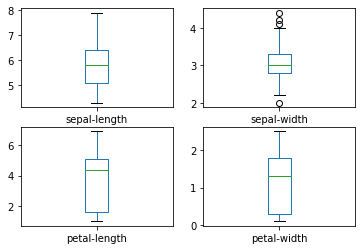

In [27]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

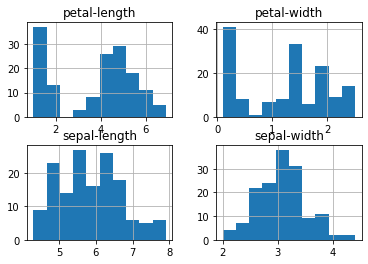

In [16]:
dataset.hist()
pyplot.show()

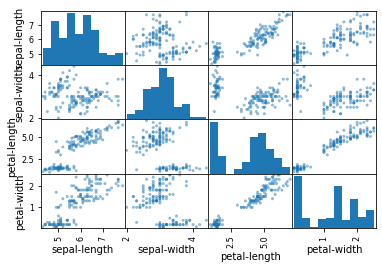

In [17]:
scatter_matrix(dataset)
pyplot.show()

In [0]:
data = dataset.values
X = data[:,0:4]
y = data[:,4]
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.20 , random_state=1)

In [20]:
#check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# get score 
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


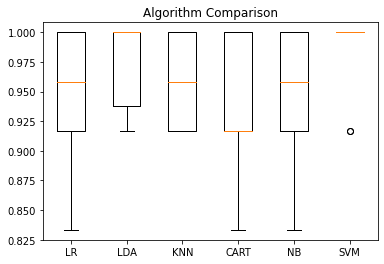

In [21]:
# diagram compare the algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [24]:
# make the prediction
model = SVC (gamma="auto")
model.fit (X_train , y_train)
predictions = model.predict (X_valid)
# evaluate the prediction
print(accuracy_score(y_valid, predictions))
print("______________________________________")
print(confusion_matrix(y_valid, predictions))
print("______________________________________")
print(classification_report(y_valid, predictions))


0.9666666666666667
______________________________________
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
______________________________________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [28]:
# áp dụng cho bài toán mới 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khoivohuy","key":"02df61ffe25a9966bf3dcafeb89f10a6"}'}

In [29]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 65 Jun  2 08:54 kaggle.json


In [55]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 5.79MB/s]


In [56]:
!unzip heart-disease-uci.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [58]:
heart = read_csv('heart.csv')
print (heart.shape)
print (heart.head(20))

(303, 14)
    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0    63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1    37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2    41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3    56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4    57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5    57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6    56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7    44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8    52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9    57    1   2       150   168    0  ...      0      1.6      2   0     2       1
10   54    1   0       140   239    0  ...      0      1.2      2 

In [59]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
print (heart.groupby('target').size())

target
0    138
1    165
dtype: int64


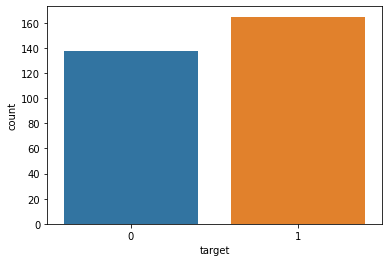

In [67]:
import seaborn as sns
sns.countplot(heart['target'])
pyplot.show()

In [0]:
features = heart.columns

<Figure size 1008x1008 with 0 Axes>

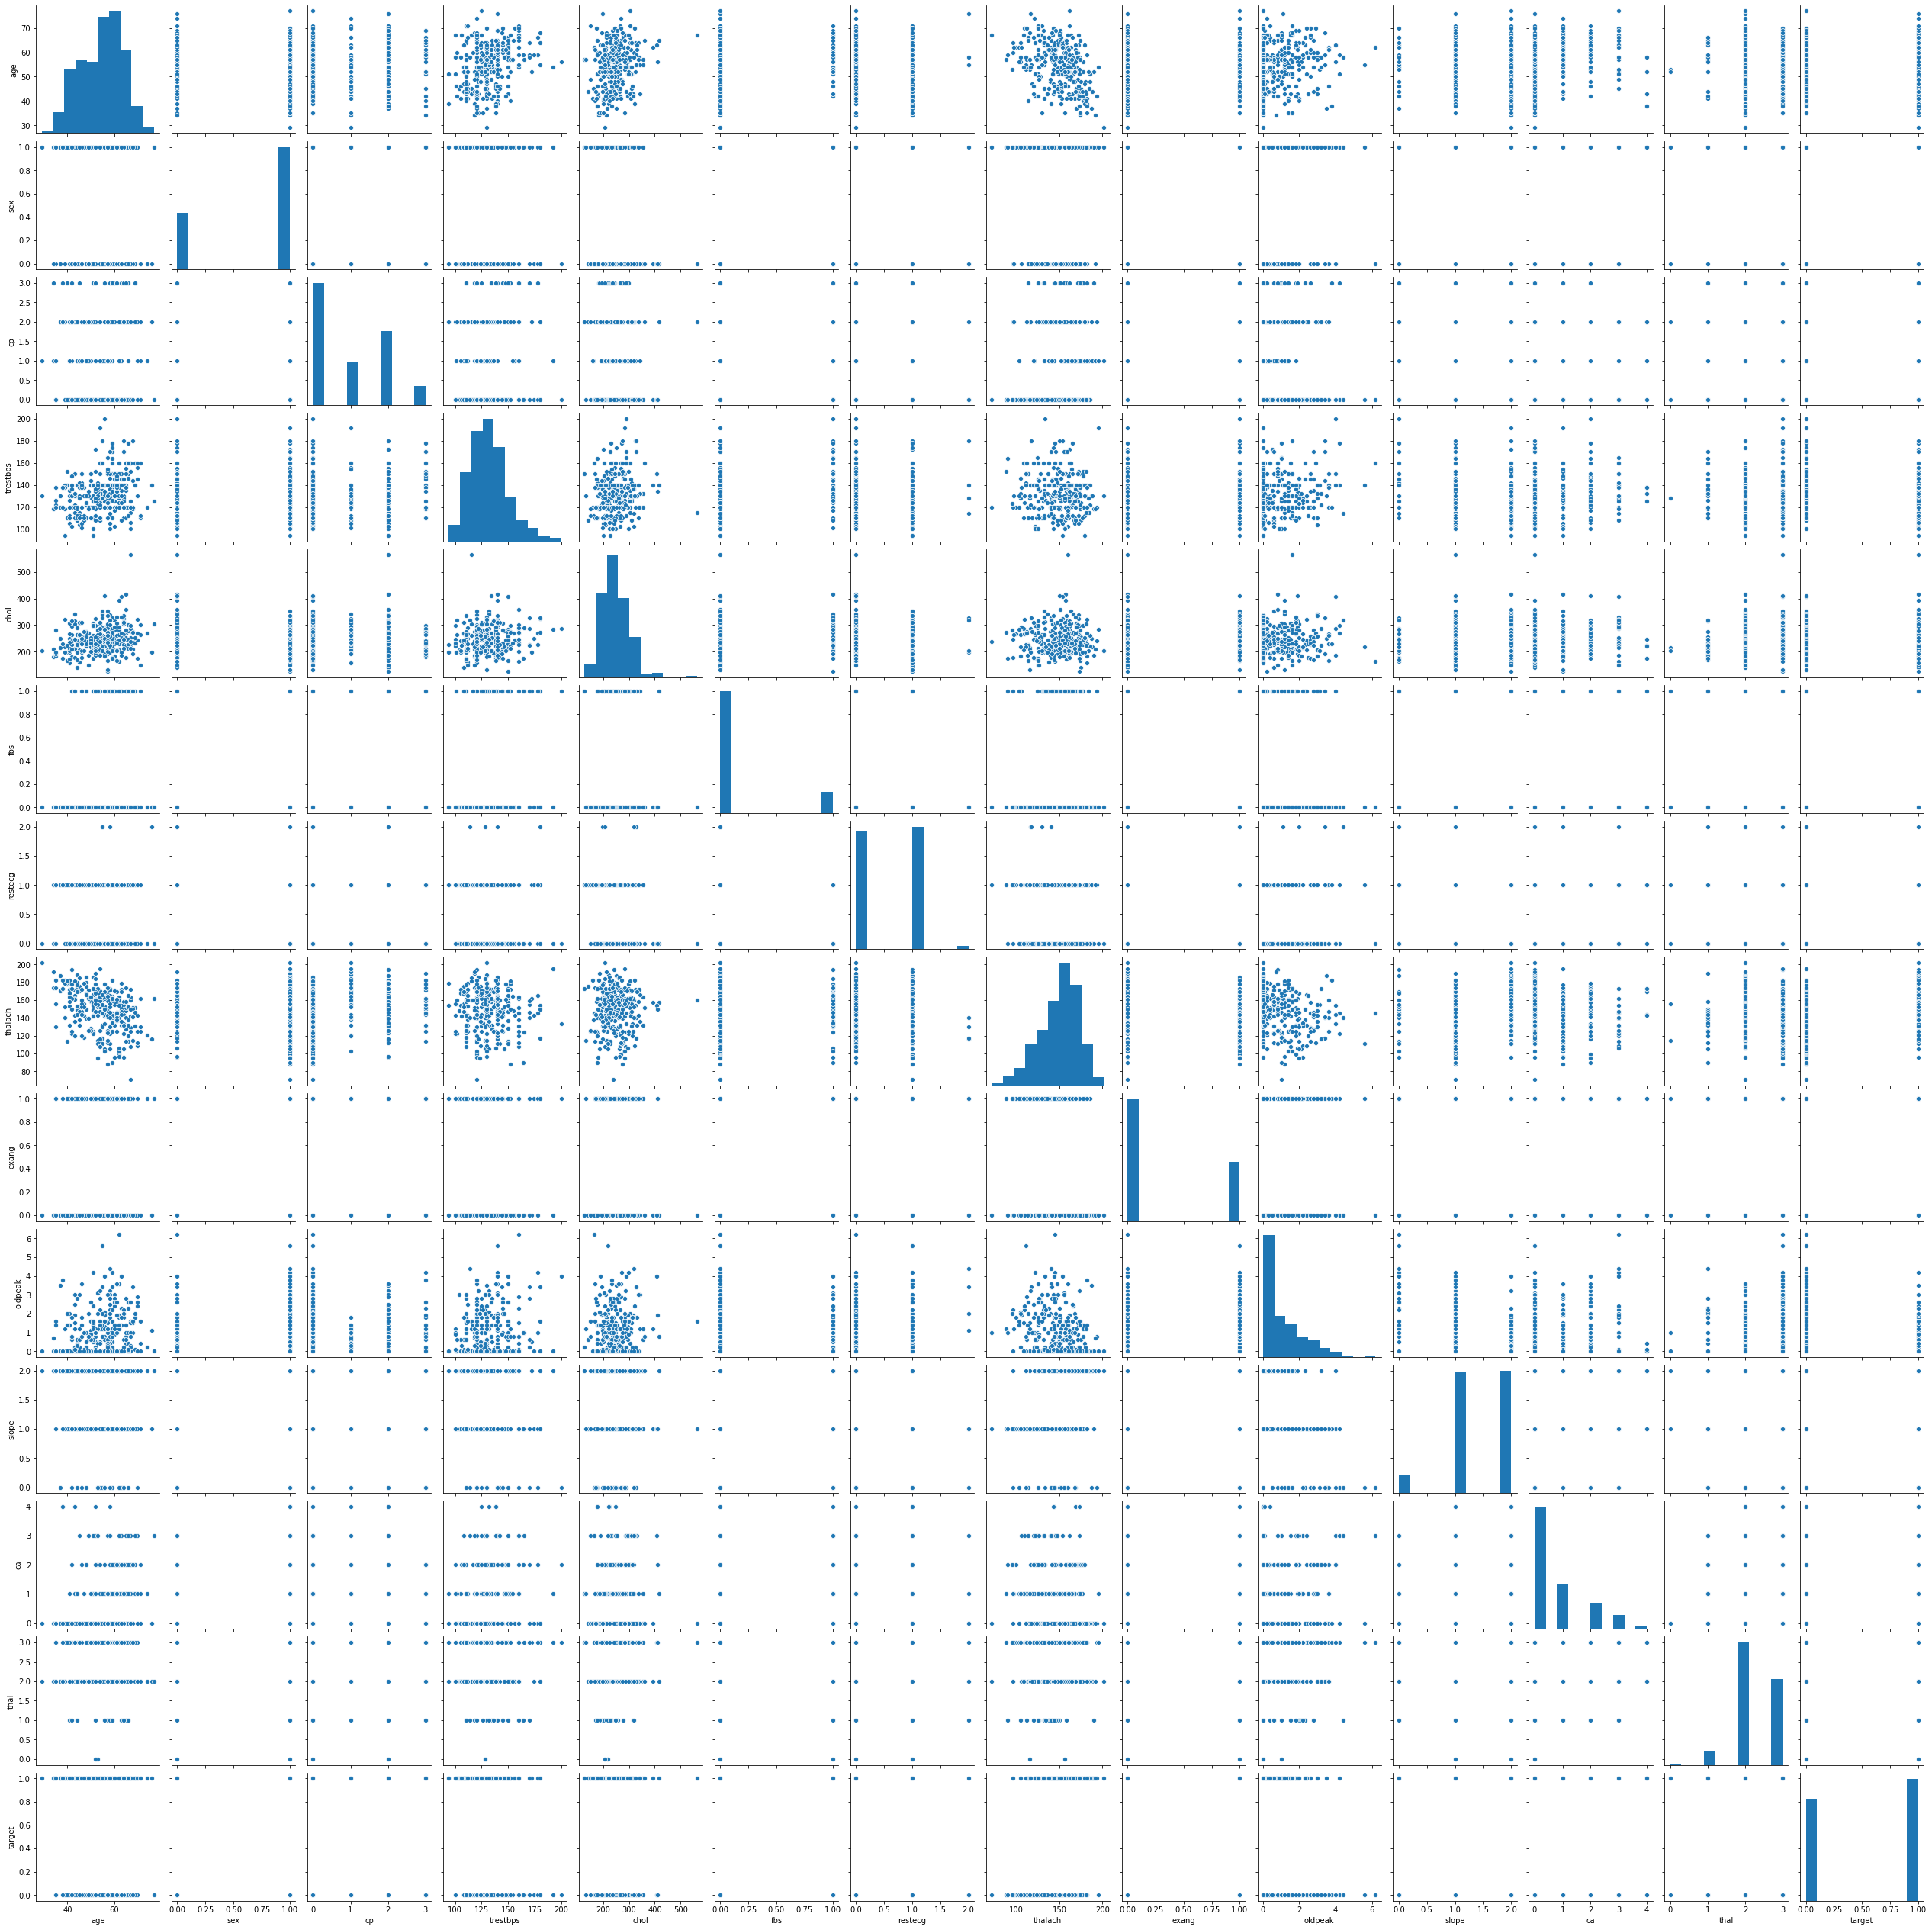

In [73]:
pyplot.figure(figsize=(14,14))
sns.pairplot(heart[features],palette='coolwarm')
pyplot.show()

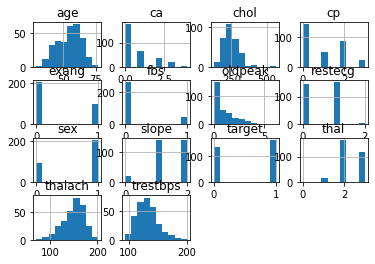

In [74]:
heart.hist()
pyplot.show()

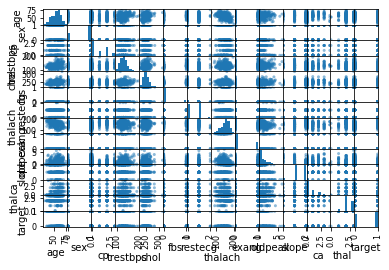

In [75]:
scatter_matrix(heart)
pyplot.show()

In [0]:
heart_data = heart.values
X = heart_data[:,0:13]
y = heart_data[:,13]
X_train , X_valid , y_train , y_valid = train_test_split (X , y , test_size=0.20 , random_state =1)

In [80]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.842667 (0.045358)
LDA: 0.842500 (0.052864)
KNN: 0.651667 (0.095948)
CART: 0.809833 (0.062041)
NB: 0.830333 (0.057777)
SVM: 0.561833 (0.022091)


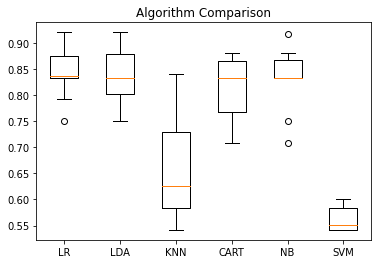

In [81]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [83]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit (X_train , y_train)
pred = model.predict (X_valid)
print(accuracy_score(y_valid, pred))
print("______________________________________")
print(confusion_matrix(y_valid, pred))
print("______________________________________")
print(classification_report(y_valid, pred))

0.7540983606557377
______________________________________
[[20 10]
 [ 5 26]]
______________________________________
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        30
         1.0       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

